## Задание
**Главная страница Яндекса.** Поменяли местами иконки "Маркет" и "Карты" над строкой поиска. Необходимо проверить повлияло ли изменение и стали ли пользователи чаще кликать на иконку "Маркета" по возвращению на сайт

Формула кликабельности иконки маркета

$$
\text{CTR} = \frac{\sum_{c_{i} \in C} \text{Clicks }}{\sum_{s_{i} \in S} \text{Sessions } }
$$

### Визуальное представление

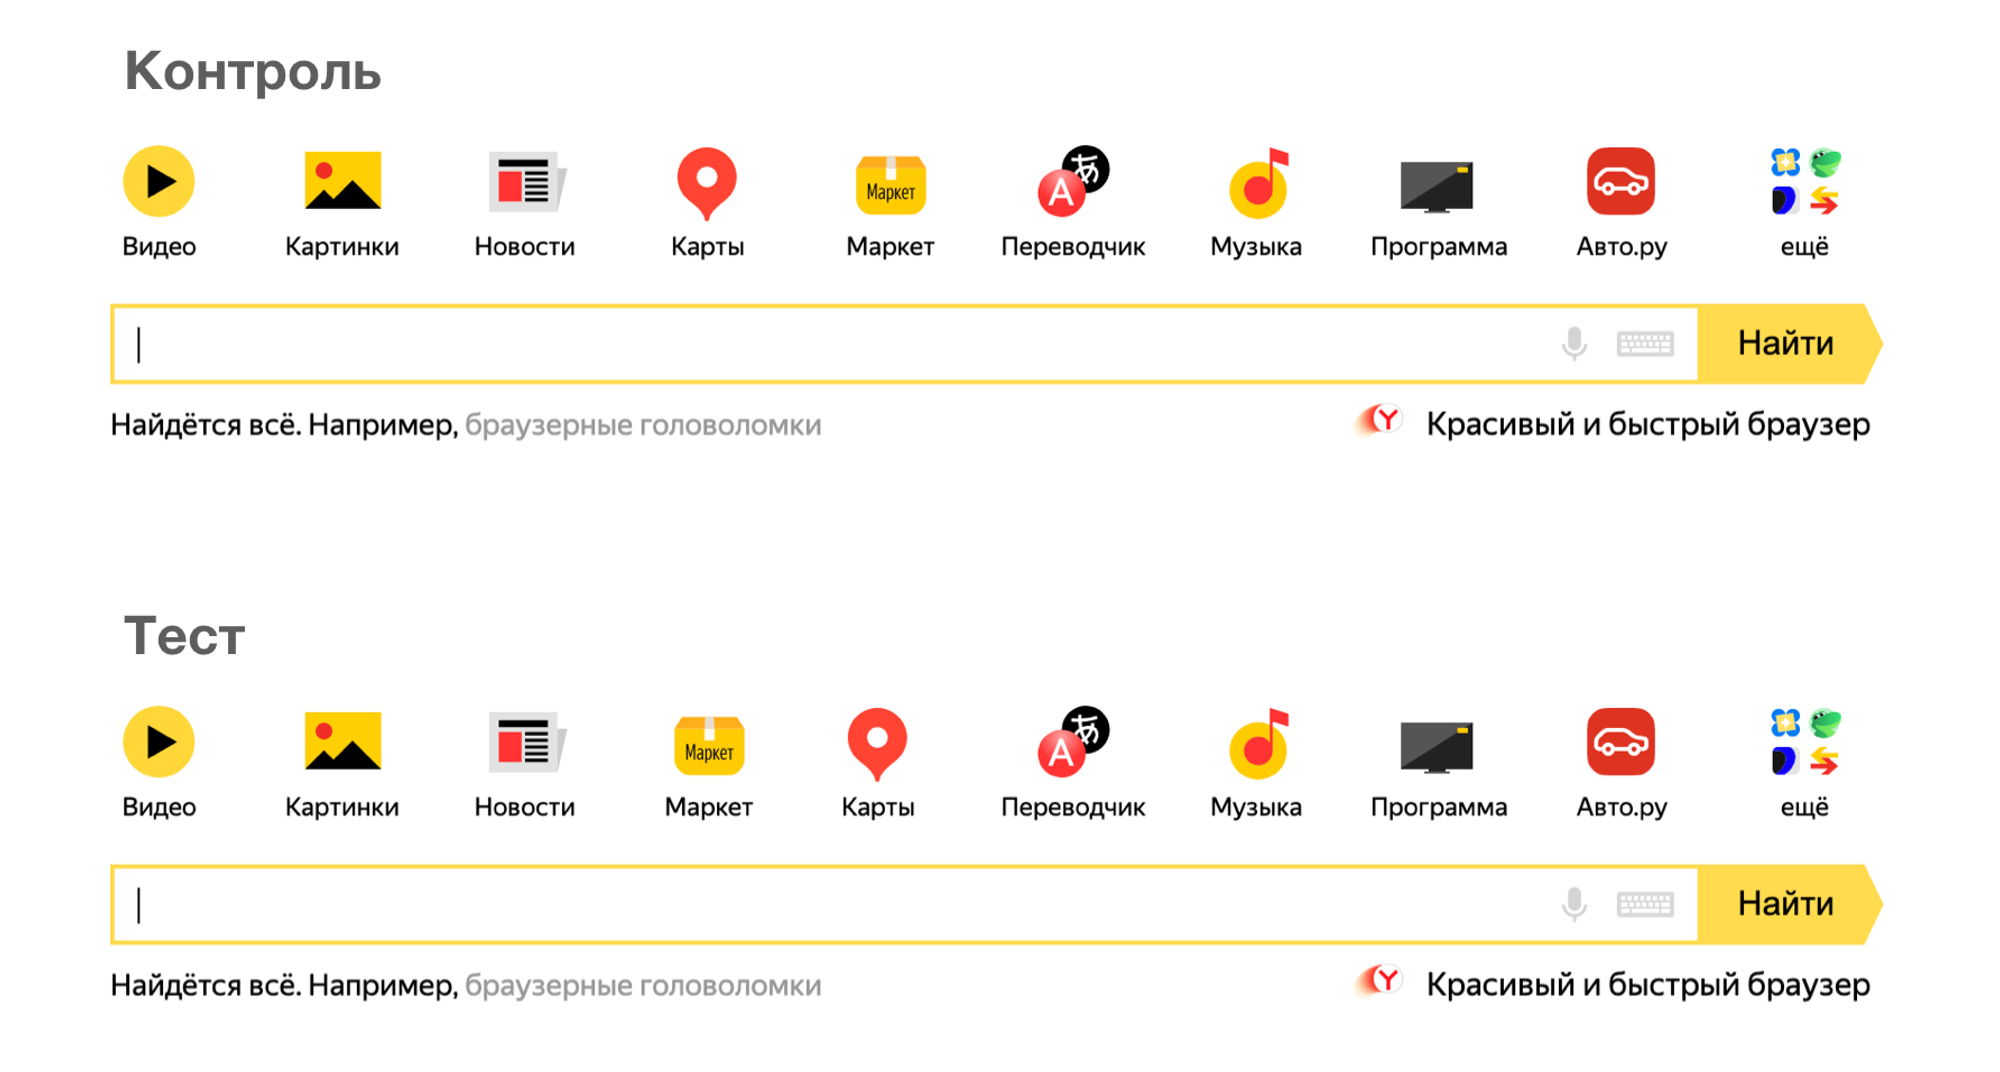

### Описание колонок

- `user_id` – идентификатор пользователя
- `session_id` – идентификатор сессии
- `click_id` – идентификатор клика
- `experimentVariant` – вариант эксперимента

### Задача

1. Проверьте гипотезу о кликабельности иконки с помощью метрики CTR (click-through-rate)
2. Напишите выводы, которые можно сделать на основе анализа результатов

In [11]:
import pandas as pd 
import numpy as np 
import scipy.stats as stats

In [12]:
case=pd.read_csv('case.csv')
case.head(10)

,Unnamed: 0,user_id,session_id,click_id,experimentVariant
0,1,4299b8c9c50c3e4e8a067f448426463e,08f9c3b0e2ff8da7bad6cc200fa735a2,56bcee80ce68ddc58c178a63288965b2,1
1,2,863829e0fc8e0dcd88f44c6a63db836a,d0ebf6ddaa8702e6de4e46854a1136ff,b209c6b14e91606a99d637ff6eb74cc6,1
2,3,640af3312483bea44b8159a8caaf0b3d,838c4a718830b5f1ac7be5e70745ff47,3f3d510c709ae5d9bae0331fcf776f3a,1
3,4,43de481cae63944b81db6fd5567a12bb,8f36aead1ceafb3e67f9957a7765549e,da73306047217a73a6ee0ea7477f2ad7,0
4,5,b84dd1a6c3df2e08eb7bef496cdf6d39,09799cdf1394b0e4b86ace899b7f218e,6e4b93932be600a5536c291888996037,1
5,6,29a558e6a92687597f5633a244686d88,d7c8ddd76cfec46860bf44c79762ef08,ffb8e4f073828c6efd6b8ae5691c6480,0
6,7,7298fc49124c18b8565b3cc26e2a226f,d3822f21862e2ea63705ca35301f716c,NaN,0
7,8,17d2974b38e8cfd7f887e7cca9c26339,37791965b026a6051134857e7e8810ce,5df86ba51acb5d8efc477dd1c1aa9639,1
8,9,0c7df63f3072b3852ce1f38b54c6516a,d00aafdf5fedb568ebe8a43aa662ad23,5508c8c411f08c97497e5484d639d570,0
9,10,eb1569d025bb1fac5041838401eb32cc,76c532a0e78ad21121b50ea835b834ec,255da89ab2382caa21d2917223524be7,1


In [13]:
case.drop('Unnamed: 0', axis=1, inplace=True)
case.experimentVariant.value_counts()

0    5112
1    4888
Name: experimentVariant, dtype: int64

В данных было разбиение только на 2 группы: экспериментальную и контрольную. В группу 0 вошли 5112 наблюдений, а в первую группу 4888. В первую очередь проверим, действительно ли разбиение на группы равномерное (группы приблизительно равны), с помощью критерия согласия хи-квадрат: 

In [14]:
group_0_count=case.experimentVariant.value_counts()[0]
group_1_count=case.experimentVariant.value_counts()[1]
groups_sum=case.experimentVariant.value_counts().sum()
stats.chisquare([group_0_count/groups_sum, group_1_count/groups_sum], [0.5, 0.5])

Power_divergenceResult(statistic=0.0005017599999999989, pvalue=0.982128880352678)

p-value больше уровня значимости 0.05, поэтому предполагаем, что количество наблюдений в обеих группах совпадает.


Пустые значения в колонке с кликом подразумевают, что пользователь все-таки не нажал на иконку. Разделим наблюдения по группам и укажем и рассчитаем средние CTR:

In [15]:
case_0=case[case.experimentVariant==0]
case_1=case[case.experimentVariant==1]

In [16]:
#средний CTR по группам
pe=case_0.click_id.count()/case_0.session_id.count()-case_1.click_id.count()/case_1.session_id.count()
print(f'CTRmean для группы 0: {case_0.click_id.count()/case_0.session_id.count():0.3f}')
print(f'CTRmean для группы 1: {case_1.click_id.count()/case_1.session_id.count():0.3f}')

CTRmean для группы 0: 0.773
CTRmean для группы 1: 0.758


In [17]:
case_0.groupby('session_id')['click_id'].count().sort_values(ascending=False)
#Формула CTR в данном случае рассчитывается как доля кликов на сессию

session_id
7df239003dc965e3e620b454fec71302    11
a7d83b8861355c0369b07553b9316aef    10
6041874486e7bdb0dd9484489a4bcda5    10
f9529f8043c3b988d754b82f8147cd54     9
5329cc2a11be3309ff23d61024a5969d     9
                                    ..
207d8f98d2eb8996f84d514b51713a04     0
9027c5a8e514573cc1ba9b3eabdecc3e     0
201d17b98039a15c77731ff6b29d0053     0
1fc33a4d50f1bf1590e200f8ead10fe7     0
233c476a64282cb64a68717f78aa1e9a     0
Name: click_id, Length: 3201, dtype: int64

Поскольку в данном случае рассматриваем CTR, то есть ratio-метрику, мы предполагаем, что наблюдения для одного объекта зависимы - наблюдения для каждой сессии встречаются по несколько раз (t-тест нельзя использовать, будем использовать бутстрап и z-тест для пропорций)
Рассмотрим z-тест для пропорций по собранным выборкам: 

In [18]:
from statsmodels.stats.proportion import proportions_ztest

count=np.array([case_0.click_id.count(),case_1.click_id.count()])
nobs=np.array([case_0.session_id.count(),case_1.session_id.count()])
proportions_ztest(count, nobs)[1] #p-value для данных групп превышает 0.05
# мы не можем опровергнуть нулевую гипотезу о равенстве click-to-rate для экспериментальной и контрольной группы
# однако данная оценка является точечной

0.0745718662813273

Рассчитаем сумму кликов и общее количество наблюдений по каждой сессии (отдельно для обеих групп)

In [19]:
case_0.loc[case_0['click_id'].isna(), 'click']=0
case_0.loc[~case_0['click_id'].isna(), 'click']=1
grouped_0=case_0.groupby('session_id')['click'].agg(['sum', 'count']).sort_values(by='sum', ascending=False)
grouped_0['index']=np.arange(grouped_0.shape[0])
grouped_0=grouped_0.set_index(grouped_0['index'])
grouped_0.drop('index', axis=1, inplace=True)
grouped_0

C:\Users\DELL\AppData\Local\Temp\ipykernel_22400\3777984359.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  case_0.loc[case_0['click_id'].isna(), 'click']=0


,sum,count
index,,
0,11.0,12
1,10.0,10
2,10.0,12
3,9.0,10
4,9.0,9
...,...,...
3196,0.0,1
3197,0.0,1
3198,0.0,1


In [20]:
case_1.loc[case_1['click_id'].isna(), 'click']=0
case_1.loc[~case_1['click_id'].isna(), 'click']=1
grouped_1=case_1.groupby('session_id')['click'].agg(['sum', 'count']).sort_values(by='sum', ascending=False)
grouped_1['index']=np.arange(grouped_1.shape[0])
grouped_1=grouped_1.set_index(grouped_1['index'])
grouped_1.drop('index', axis=1, inplace=True)
grouped_1

C:\Users\DELL\AppData\Local\Temp\ipykernel_22400\586813671.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  case_1.loc[case_1['click_id'].isna(), 'click']=0


,sum,count
index,,
0,12.0,13
1,12.0,12
2,10.0,13
3,9.0,9
4,9.0,12
...,...,...
3057,0.0,1
3058,0.0,1
3059,0.0,1


Проведем бутстреп и рассчитаем pvalue z-теста для пропорций и разности общегруппового CTR для каждой пары сгенерированных выборок - это поможет оценить СКО для полученного значения и оценить доверительные интервалы.



In [21]:
def bootstrap(group_0, group_1, n_choices):
    a_indexes=np.random.choice(group_0.index, size=(n_choices, group_0.shape[0]), replace=True)
    b_indexes=np.random.choice(group_1.index, size=(n_choices, group_1.shape[0]), replace=True)
    
    list_pvalue=[]
    list_diff=[]
    for i, j in zip(a_indexes, b_indexes):
        bootstrap_choice_0=group_0.loc[i].to_numpy()
        bootstrap_choice_1=group_1.loc[j].to_numpy()
        count=np.array([bootstrap_choice_0[:, 0].sum(), bootstrap_choice_1[:, 0].sum()])
        nobs=np.array([bootstrap_choice_0[:, 1].sum(), bootstrap_choice_1[:, 1].sum()])
        list_pvalue.append(proportions_ztest(count, nobs)[1])
        mean_pvalue=np.mean(list_pvalue)
        
        diff=bootstrap_choice_0[:, 0].sum()/bootstrap_choice_0[:, 1].sum() - bootstrap_choice_1[:, 0].sum()/bootstrap_choice_1[:, 1].sum()
        list_diff.append(diff)

    return list_pvalue, list_diff
    
pvalues, diffs=bootstrap(grouped_0, grouped_1, 15000)

Медианное и среднее значения по полученному распределению также больше заданного уровня значимости 5%, что не позволяет отвергнуть нулевую гипотезу

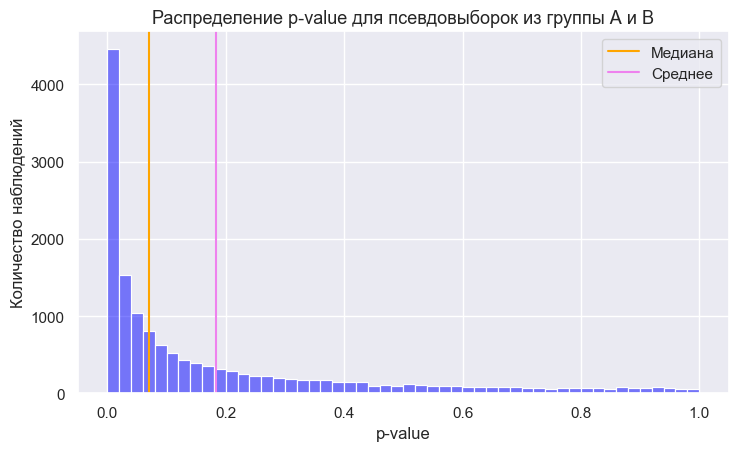

Среднее: 0.1834317990207049
Медиана: 0.07101564166959864
СКО: 0.24286126862546864


In [22]:
import seaborn as sns 
import matplotlib.pyplot as plt 

sns.set(rc={'figure.figsize':(8.4, 4.7)})
sns.histplot(pvalues, bins=50, color='blue', alpha=0.5)
plt.axvline(np.median(pvalues), color='orange')
plt.axvline(np.mean(pvalues), color='violet')
plt.title('Распределение p-value для псевдовыборок из группы А и B', fontsize=13)
plt.xlabel('p-value')
plt.ylabel('Количество наблюдений')
plt.legend(['Медиана', 'Среднее'])
plt.show()

print(f'Среднее: {np.mean(pvalues)}')
print(f'Медиана: {np.median(pvalues)}')
print(f'СКО: {np.std(pvalues)}')

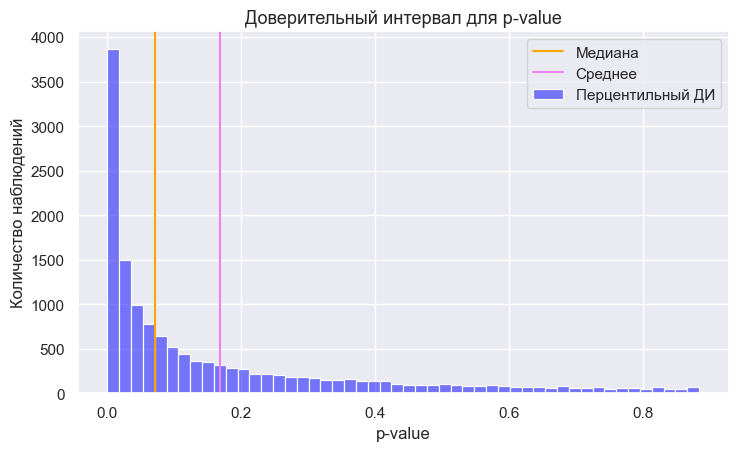

Доверительный интервал для p-value: [0.00019; 0.88463]
Среднее: 0.16838097595343496
Медиана: 0.07101564166959864
СКО: 0.2143262649858114


In [23]:
#перцентильный доверительный интервал 

alpha=0.05
low_perc=np.quantile(pvalues, alpha/2)
high_perc=np.quantile(pvalues, 1-alpha/2)
pv_interval=list(filter(lambda pvalue: pvalue>low_perc and pvalue<high_perc, pvalues))

sns.set(rc={'figure.figsize':(8.4, 4.7)})
sns.histplot(pv_interval, bins=50, color='blue', alpha=0.5)
plt.axvline(np.median(pv_interval), color='orange')
plt.axvline(np.mean(pv_interval), color='violet')
plt.title('Доверительный интервал для p-value', fontsize=13)
plt.xlabel('p-value')
plt.ylabel('Количество наблюдений')
plt.legend(['Медиана','Среднее', 'Перцентильный ДИ'])
plt.show()

print(f'Доверительный интервал для p-value: [{low_perc:0.5f}; {high_perc:0.5f}]')
print(f'Среднее: {np.mean(pv_interval)}')
print(f'Медиана: {np.median(pv_interval)}')
print(f'СКО: {np.std(pv_interval)}')

Построим распределение разности конверсий в клик

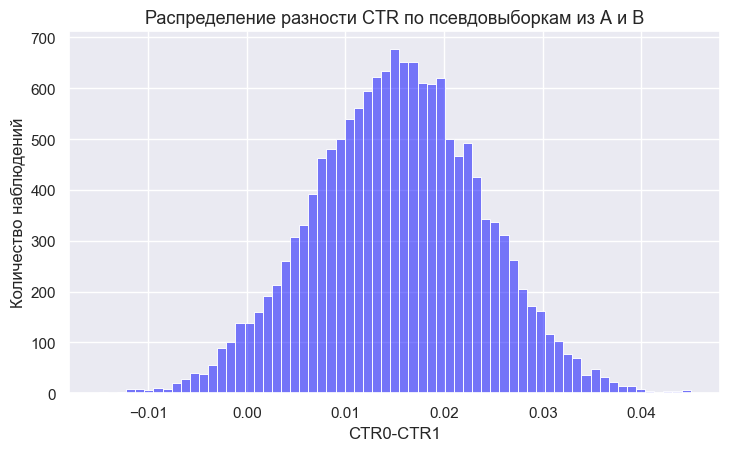

In [24]:
sns.set(rc={'figure.figsize':(8.4, 4.7)})
sns.histplot(diffs, color='blue', alpha=0.5)
plt.title('Распределение разности CTR по псевдовыборкам из А и В', fontsize=13)
plt.xlabel('CTR0-CTR1')
plt.ylabel('Количество наблюдений')
plt.show()

В распределении встречаются значения меньше нуля, поэтому для подтверждения отсутствия значимой разницы между конверсиями групп построим доверительный интервал для выборочных значений. Распределение по форме близко к нормальному, поэтому используем нормальный доверительный интервал

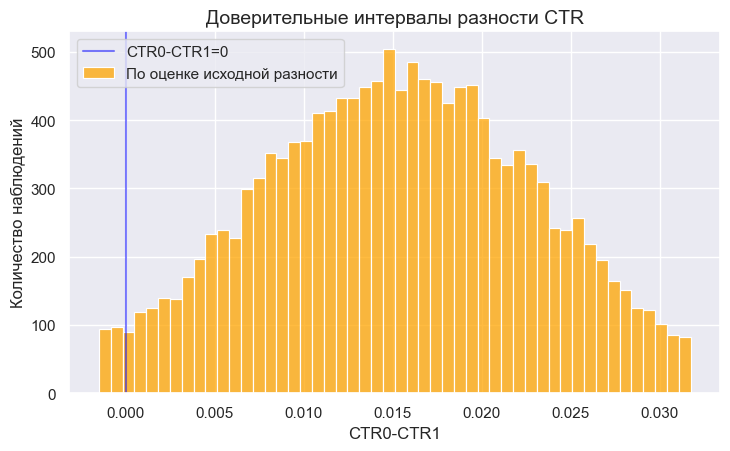

Доверительный интервал по средней оценке разности: [-0.00153; 0.03175]
Среднее: 0.015239568974608163
Медиана: 0.015291246949507231
СКО: 0.007425799770454926


In [25]:
#нормальный доверительный интервал

std=np.std(diffs)
low_norm=pe-1.96*std
high_norm=pe+1.96*std
diffs_norm=list(filter(lambda diff: diff<=high_norm and diff>=low_norm, diffs))

sns.set(rc={'figure.figsize':(8.4, 4.7)})
sns.histplot(diffs_norm, color='orange', bins=50)
plt.axvline(0, color='blue', alpha=0.5)
plt.title('Доверительные интервалы разности CTR', fontsize=14)
plt.xlabel('CTR0-CTR1')
plt.ylabel('Количество наблюдений')
plt.legend(labels=['CTR0-CTR1=0','По оценке исходной разности'])
plt.show()

print(f'Доверительный интервал по средней оценке разности: [{low_norm:0.5f}; {high_norm:0.5f}]')
print(f'Среднее: {np.mean(diffs_norm)}')
print(f'Медиана: {np.median(diffs_norm)}')
print(f'СКО: {np.std(diffs_norm)}') 

95-процентный доверительный интервал включает ноль, поэтому также делаем вывод, что мы не можем утверждать о значимой разнице между конверсиями для тех, у кого слева была иконка Яндекс.Маркета, и тех, у кого слева была иконка Яндекс.Карт.

Следовательно, при условии корректного дизайна AB-теста, __утверждать о наличии значимой разницы CTR нельзя__, вне зависимости от первоначально заданного MDE